# Preprocessing

In [29]:
# IMPORTING PACKAGES

import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
from math import floor
from termcolor import colored as cl
from scipy.signal import argrelextrema
import seaborn as sns

def classify_sample(x):
    class_dict = {0:'hold',1:'sell',2:'buy'}
    if class_dict.get(x):
        return class_dict.get(x)
    else:
        return 'error'

#-- Lista de empresas
empresa = {
    'Apple': 'AAPL',
    'Microsoft': 'MSFT',
    'Google': 'GOOG',
    'Amazon': 'AMZN',
    'Tesla': 'TSLA',
    'NVIDIA': 'NVDA',
    'Meta': 'META'
}


def preprocessing(empresa):
    n=10

    df_list = []
    for name,ativo in empresa.items():
        df = pd.read_csv(f'../Dataset/Raw/{name.lower()}_data.csv')
        df['Date'] = pd.to_datetime(df['Date'])
        df['Mean'] = df['Close'].rolling(3).mean()

        df['Dif'] = df['Open'] - df['Close']

        df['loc_min'] = df.iloc[argrelextrema(df.Close.values, np.less_equal, order = n, mode='wrap',)[0]]['Close']
        df['loc_max'] = df.iloc[argrelextrema(df.Close.values, np.greater_equal, order = n, mode='wrap',)[0]]['Close']
        df['teste_max0'] = df['loc_max'].apply(lambda x: 1 if x > 0 else 0) 
        df['teste_max1'] = df['teste_max0'].shift(1)
        df['teste_max2'] = df['teste_max0'].shift(-1)
        df['teste_min0'] = df['loc_min'].apply(lambda x: 2 if x > 0 else 0) 
        df['teste_min1'] = df['teste_min0'].shift(1)
        df['teste_min2'] = df['teste_min0'].shift(-1)
        df['target'] = df[['teste_max0','teste_max1','teste_max2',
                                'teste_min0','teste_min1','teste_min2']].sum(axis=1).astype(int)
        df['moment'] = df['target'].apply(lambda x: classify_sample(x))
        df['Action'] = df['moment'].apply(lambda x: 0 if x == 'hold' else 1)

        df = df[['Date','Close','Mean','Dif','Volume','Empresa', 'Symbol','target', 'moment', 'Action']].reset_index(drop=True)
        df.to_csv(f'../Dataset/Refined/{name.lower()}_ref.csv',index=False)
        df_list.append(df)

    new_df = pd.concat(df_list)
    new_df.reset_index(drop=True,inplace=True)
    new_df.to_csv(f'../Dataset/Refined/full_data_ref.csv',index=False)

preprocessing(empresa)

df = pd.read_csv('/Users/cora/Documents/mba_uspesalq_tcc/Dataset/Refined/full_data_ref.csv')
df.moment.value_counts(normalize=True)*100



hold     81.857589
buy       9.146341
sell      8.892036
error     0.104034
Name: moment, dtype: float64

,Date,Close,Mean,Dif,Volume,Empresa,Symbol,target,moment,Action
5787,2023-01-03,124.538666,127.658681,5.187865,112117500,Apple,AAPL,0,hold,0
5788,2023-01-04,125.823189,126.579954,0.527747,89113600,Apple,AAPL,2,buy,1
5789,2023-01-05,124.488876,124.950244,2.101037,80962700,Apple,AAPL,2,buy,1
5790,2023-01-06,129.069321,126.460462,-3.594656,87754700,Apple,AAPL,2,buy,1
5791,2023-01-09,129.597061,127.718419,0.318648,70790800,Apple,AAPL,0,hold,0


<Axes: xlabel='Date', ylabel='Close'>

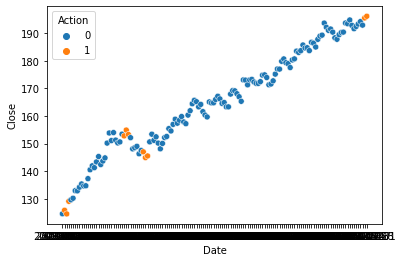

In [34]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/Users/cora/Documents/mba_uspesalq_tcc/Dataset/Refined/apple_ref.csv')
df = df[df.Date >= '2023-01-01']

display(df.head())


sns.scatterplot(data=df,x='Date',y='Close',hue='Action')
# sns.scatterplot(data=df[df.moment == 'sell'],x='Close',y='Dif',label='sell',c='g')
# sns.scatterplot(data=df[df.moment == 'buy'],x='Close',y='Dif',label='buy',c='r')
# sns.scatterplot(data=df[df.moment == 'error'],x='Close',y='Dif',label='error',c='k')
